# ODE (IVP / BVP)

> How to solve ODE (Ordinary Differential Equation) using scipy
- IVP : Initial Value Problem
- BVP : Boundary Value Problem

In [ ]:
#| default_exp ode

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt

All numerical methods in Python need `numpy`.

To draw the result (solution of ODE) as a graph, we need a visualization software such as `matplotlib`.

## Reduction to single 1st order ODE

### nth-order ODE
Every n-th order ODE

$$
\frac{d^n f(x)}{dx^n} = \mathcal{F}\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2 f(x)}{dx^2}, \cdots, \frac{d^{n-1} f(x)}{dx^{n-1}} \right)
$$ 

can be expressed in the 1st order ODE form

$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x))
$$

with a state vector $\mathbf{S}(x)$ defined as following:

$$
\mathbf{S}(x) = \begin{bmatrix}
                     f(x) \\
                     \displaystyle\frac{df(x)}{dx} \\
                     \displaystyle\frac{d^2 f(x)}{dx^2} \\
                     \vdots \\
                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}  \\
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1] \\
                     S[2] \\
                     \vdots \\
                     S[n-1]  \\
                 \end{bmatrix}
$$

Then, the given ODE $\frac{d\mathbf{S}}{dx}$ can be expressed using the elements of $\mathbf{S}(x)$.

$$
\frac{d\mathbf{S}}{dx} = \begin{bmatrix}
                             \displaystyle\frac{df(x)}{dx} \\
                             \displaystyle\frac{d^2 f(x)}{dx^2} \\
                             \displaystyle\frac{d^3 f(x)}{dx^3} \\
                             \vdots \\
                             \displaystyle\frac{d^{n} f(x)}{dx^{n}}  \\
                         \end{bmatrix}
                        = \begin{bmatrix}
                             \displaystyle\frac{df(x)}{dx} \\
                             \displaystyle\frac{d^2 f(x)}{dx^2} \\
                             \displaystyle\frac{d^3 f(x)}{dx^3} \\
                             \vdots \\
                             \mathcal{F}\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2 f(x)}{dx^2}, \cdots, \frac{d^{n-1} f(x)}{dx^{n-1}} \right)  \\
                         \end{bmatrix}
                         = \begin{bmatrix}
                             S[1] \\
                             S[2] \\
                             S[3] \\
                             \vdots \\
                             \mathcal{F}\left(x, S[0], S[1], S[2], \cdots, S[n-1] \right)  \\
                         \end{bmatrix}
$$

### System of 1st order ODEs

Every system of 1st order ODEs

$$
\begin{cases}
  \displaystyle\frac{df_1(x)}{dx} = \mathcal{G_1}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\ 
  \displaystyle\frac{df_2(x)}{dx} = \mathcal{G_2}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
  \quad\; \vdots \\
  \displaystyle\frac{df_k(x)}{dx} = \mathcal{G_k}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\ 
\end{cases}
$$ 

can be expressed in the 1st order ODE form

$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x))
$$

with a state vector $\mathbf{S}(x)$ defined as following:

$$
\mathbf{S}(x) = \begin{bmatrix}
                     f_1(x) \\
                     f_2(x) \\
                     \vdots \\
                     f_k(x)  \\
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1] \\
                     S[2] \\
                     \vdots \\
                     S[k-1]  \\
                 \end{bmatrix}
$$

Then, the given ODE $\frac{d\mathbf{S}}{dx}$ can be expressed using the elements of $\mathbf{S}(x)$.

$$
\frac{d\mathbf{S}}{dx} = \begin{bmatrix}
                             \displaystyle\frac{df_1(x)}{dx} \\
                             \displaystyle\frac{df_2(x)}{dx} \\
                             \vdots \\
                             \displaystyle\frac{df_k(x)}{dx}  \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                             \mathcal{G_1}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
                             \mathcal{G_2}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right) \\
                             \vdots \\
                             \mathcal{G_k}\left(x, f_1(x), f_2(x), \cdots, f_k(x) \right)  \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                             \mathcal{G_1}\left(x, S[0], S[1], \cdots, S[k-1] \right) \\
                             \mathcal{G_2}\left(x, S[0], S[1], \cdots, S[k-1] \right) \\
                             \vdots \\
                             \mathcal{G_3}\left(x, S[0], S[1], \cdots, S[k-1] \right)  \\
                         \end{bmatrix}
$$

## ODE - IVP(Initial Value Problem)

### How to solve IVP using scipy

The overall structure is as follows:

```python
from scipy.integrate import solve_ivp

sol = solve_ivp(F, t_span, y0, t_eval=t)
```

### The given problem

- Target `y`
$$
\mathbf{S}(t)
$$

- ODE system `F(t, y)`
$$
\frac{d\mathbf{S}}{dt} = \mathbf{F}(t, \mathbf{S}(t))
$$

- Domain `t_span=[t_0, t_f]`
$$
t \in [t_0, t_f]
$$
    - If the number of points `N` is given, `t = np.linspace(t_span[0], t_span[1], N)`.

    - If the spacing `h` is given, `t = np.arange(t_span[0], t_span[1]+h, h)`. Here, the purpose of `+h` in `t_span[1]+h` is to include the value of `t_span[1]` in the array `t`.


- Initial condition `y0`
$$
\mathbf{S}(t_0)
$$

### Solution

- Target `sol.y`
$$
\mathbf{S}(t)
$$

- Domain `sol.t`
$$
t = [t_0, \cdots, t_f]
$$

### References
- [scipy solve_ivp docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
- [PDF about IVP and BVP in Python](https://acme.byu.edu/0000017c-ccfe-da17-a5fd-cdfeff540000/acmefiles-08-bvp-2021-pdf)
- [Python Programming and Numerical Methods, Chap 22](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)
- [Blog post about odeint vs solve_ivp](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/)

## IVP Example1

$$
\begin{cases}
  y''+ 3y = \sin t \\ 
  t \in [0, 5] \\
  y(0) = -\frac{\pi}{2} \\
  y'(0) = \pi \\
\end{cases}
$$ 

### Rewrite ODE using $\mathbf{S}(t)$

- Target `y`
$$
\mathbf{S}(t) = \begin{bmatrix}
                    y(t) \\
                    y'(t) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    S[0] \\
                    S[1] \\
                \end{bmatrix}
$$

- ODE system `F(t, y)`
$$
\frac{d\mathbf{S}}{dt} = \mathbf{F}(t, \mathbf{S}(t)) 
                       = \begin{bmatrix}
                            y'(t) \\
                            y''(t) \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            y' \\
                            -3y + \sin t \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            S[1] \\
                            -3S[0] + \sin t \\
                         \end{bmatrix}
$$

- Domain

```python
t_span = [0, 5]
h = 0.1 # spacing
t = np.arange(t_span[0], t_span[1]+h, h)
```

- Initial condition `y0`
$$
\mathbf{S}(0) = \begin{bmatrix}
                    y(0) \\
                    y'(0) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    -\frac{\pi}{2} \\
                    \pi \\
                \end{bmatrix}
$$

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def F(t, y):
    return [y[1], -3*y[0] + np.sin(t)]

t_span = [0, 5]
h = 0.1
t = np.arange(t_span[0], t_span[1]+h, h)

y0 = [-np.pi/2, np.pi]

We can solve this problem from the above information.

In [ ]:
sol = solve_ivp(F, t_span, y0, t_eval=t)

Solution info

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  4.900e+00  5.000e+00]
        y: [[-1.571e+00 -1.235e+00 ...  1.669e+00  1.710e+00]
            [ 3.142e+00  3.568e+00 ...  7.144e-01  1.089e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

Domain $t$

In [ ]:
sol.t

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])

Target state vector $\mathbf{S}(t)$

In [ ]:
sol.y

array([[-1.57079633, -1.23453277, -0.86030514, -0.45843048, -0.03984597,
         0.38403622,  0.80132899,  1.20010117,  1.56956933,  1.89899569,
         2.17913795,  2.40237059,  2.56269013,  2.65611774,  2.6797985 ,
         2.63269535,  2.5161626 ,  2.33394593,  2.09215279,  1.79786469,
         1.45927277,  1.08592922,  0.68838898,  0.27820968, -0.13264009,
        -0.53292218, -0.91109765, -1.256714  , -1.56047376, -1.81423449,
        -2.01153094, -2.14738851, -2.21825989, -2.22290454, -2.16239147,
        -2.04004441, -1.8604542 , -1.62961589, -1.35504951, -1.04569361,
        -0.71190521, -0.36459551, -0.01451474,  0.32717482,  0.64994   ,
         0.94388468,  1.1997787 ,  1.40987673,  1.56773208,  1.66861058,
         1.70977222],
       [ 3.14159265,  3.56848512,  3.89917004,  4.12291412,  4.23214869,
         4.2232754 ,  4.09666617,  3.85641458,  3.50881107,  3.06297723,
         2.53105399,  1.92817178,  1.2724329 ,  0.58252342, -0.12206293,
        -0.82113985, -1.49509

Draw the solution

In [ ]:
#| export
def draw_solution_y_yp(t, # the array of time domain [t1, t2, ... ,tN]  
                       y, # the array of ode output [y(t), y'(t)]
                      **kwargs):
    """ Draw ode output [y(t), y'(t)] """
    fig, axes = plt.subplots(nrows=2, ncols=1)

    axes[0].plot(t, y[0], **kwargs) # y(t)
    axes[0].axhline(0, color='k', linewidth=2) # x-axis
    axes[0].axvline(0, color='k', linewidth=2) # y-axis
    axes[0].grid(True)
    axes[0].set_xlabel('t')
    axes[0].set_ylabel('y(t)')
    
    axes[1].plot(t, y[1], **kwargs) # y'(t)
    axes[1].axhline(0, color='k', linewidth=2) # x-axis
    axes[1].axvline(0, color='k', linewidth=2) # y-axis
    axes[1].grid(True)
    axes[1].set_xlabel('t')
    axes[1].set_ylabel(r"$y'(t)$")
    
    plt.tight_layout()

In [ ]:
show_doc(draw_solution_y_yp)

---

### draw_solution_y_yp

>      draw_solution_y_yp (t, y, **kwargs)

Draw ode output [y(t), y'(t)]

|    | **Details** |
| -- | ----------- |
| t | the array of time domain [t1, t2, ... ,tN] |
| y | the array of ode output [y(t), y'(t)] |
| kwargs |  |

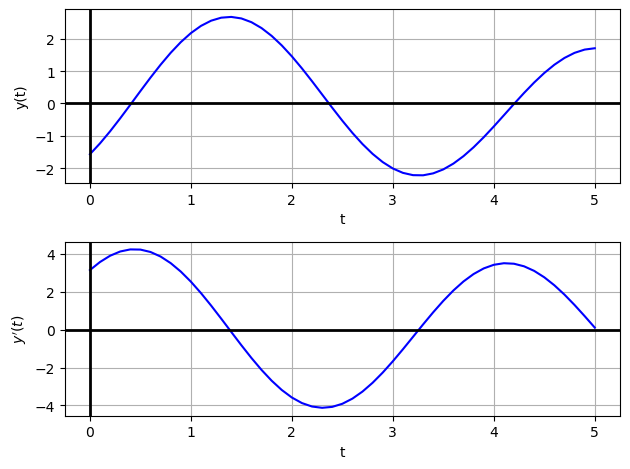

In [ ]:
draw_solution_y_yp(sol.t, sol.y, color='blue')

If `dense_output = True`, we get a solution [**function**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.OdeSolution.html#scipy.integrate.OdeSolution) as the sol.sol object.

In [ ]:
sol = solve_ivp(F, t_span, y0, t_eval=t, dense_output=True)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  4.900e+00  5.000e+00]
        y: [[-1.571e+00 -1.235e+00 ...  1.669e+00  1.710e+00]
            [ 3.142e+00  3.568e+00 ...  7.144e-01  1.089e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [ ]:
sol.sol

<scipy.integrate._ivp.common.OdeSolution>

Then we can calculate values at any point using this function.

So, it can be also used for smooth plotting.

In [ ]:
t_eval = np.linspace(-1, 6, 1000)
y_eval = sol.sol(t_eval)
y_eval.shape

(2, 1000)

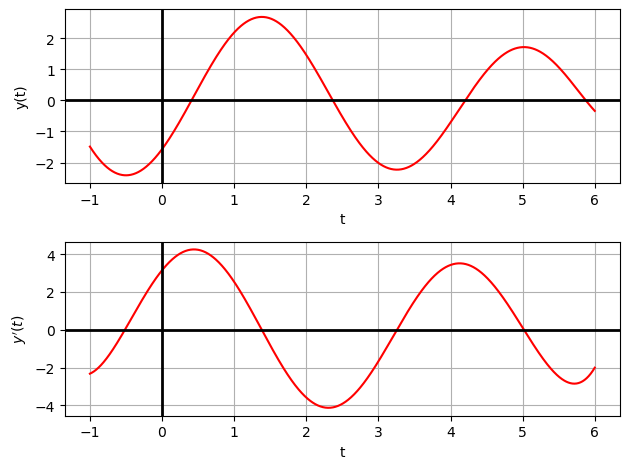

In [ ]:
draw_solution_y_yp(t_eval, y_eval, color='red')

## IVP Example2

$$
\begin{cases}
  y''- y = \sin t \\ 
  t \in [0, 5] \\
  y(0) = -\frac{1}{2} \\
  y'(0) = 0 \\
\end{cases}
$$ 

- Analytic solution
$$
y = -\frac{1}{2}(e^{-t} + \sin t)
$$

### Rewrite ODE using $\mathbf{S}(t)$

- Target `y`
$$
\mathbf{S}(t) = \begin{bmatrix}
                    y(t) \\
                    y'(t) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    S[0] \\
                    S[1] \\
                \end{bmatrix}
$$

- ODE system `F(t, y)`
$$
\frac{d\mathbf{S}}{dt} = \mathbf{F}(t, \mathbf{S}(t)) 
                       = \begin{bmatrix}
                            y'(t) \\
                            y''(t) \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            y' \\
                            y + \sin t \\
                         \end{bmatrix}
                       = \begin{bmatrix}
                            S[1] \\
                            S[0] + \sin t \\
                         \end{bmatrix}
$$

- Domain

```python
t_span = [0, 5]
N = 100 # number of points
t = np.linspace(t_span[0], t_span[1], N)
```

- Initial condition `y0`
$$
\mathbf{S}(0) = \begin{bmatrix}
                    y(0) \\
                    y'(0) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    -\frac{1}{2} \\
                    0 \\
                \end{bmatrix}
$$

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def F(t, y):
    return [y[1], y[0] + np.sin(t)]

t_span = [0, 5]
N = 100
t = np.linspace(t_span[0], t_span[1], N)

y0 = [-1/2, 0]

In [ ]:
sol = solve_ivp(F, t_span, y0, t_eval=t, dense_output=True)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[-5.000e-01 -5.006e-01 ...  4.837e-01  4.773e-01]
            [ 0.000e+00 -2.399e-02 ... -1.128e-01 -1.373e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 62
     njev: 0
      nlu: 0

In [ ]:
t_eval = np.linspace(t_span[0], t_span[1], 1000)
y_eval = sol.sol(t_eval)
y_eval.shape

(2, 1000)

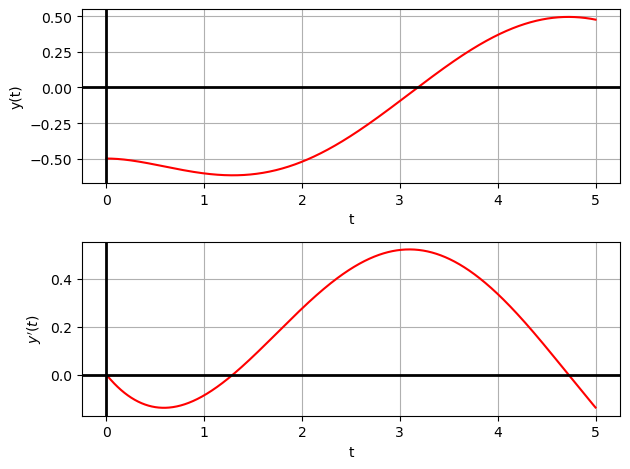

In [ ]:
draw_solution_y_yp(t_eval, y_eval, color='red')

Since we know the analytical solution (exact solution) of this ODE, let's draw the analytical solution and numerical solution together.

In [ ]:
#| export
def draw_solution_y_with_exact_y(t, # the array of time domain [t1, t2, ... ,tN]  
                                    f, # the array of ode output target function y(t)
                                    f_exact):  # the array of ode analytic function y(t)
    """ Draw ode output y(t) with analytical y(t) """
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.plot(t, f, color='blue', linestyle='solid', label='numerical') # y(t)
    ax.plot(t, f, color='red', linestyle='dashed', label='analytic') # y(t)                                 
    ax.axhline(0, color='k', linewidth=2) # x-axis
    ax.axvline(0, color='k', linewidth=2) # y-axis
    ax.grid(True)
    ax.set_xlabel('t')
    ax.set_ylabel('y(t)')
    ax.legend()
                                        
    plt.tight_layout()

In [ ]:
show_doc(draw_solution_y_with_exact_y)

---

### draw_solution_y_with_exact_y

>      draw_solution_y_with_exact_y (t, f, f_exact)

Draw ode output y(t) with analytical y(t)

|    | **Details** |
| -- | ----------- |
| t | the array of time domain [t1, t2, ... ,tN] |
| f | the array of ode output target function y(t) |
| f_exact | the array of ode analytic function y(t) |

- Analytical solution
$$
y = -\frac{1}{2}(e^{-t} + \sin t)
$$

In [ ]:
f_exact = lambda t: -0.5*(np.exp(-t) + np.sin(t))
y_exact = f_exact(t_eval)
y_exact.shape

(1000,)

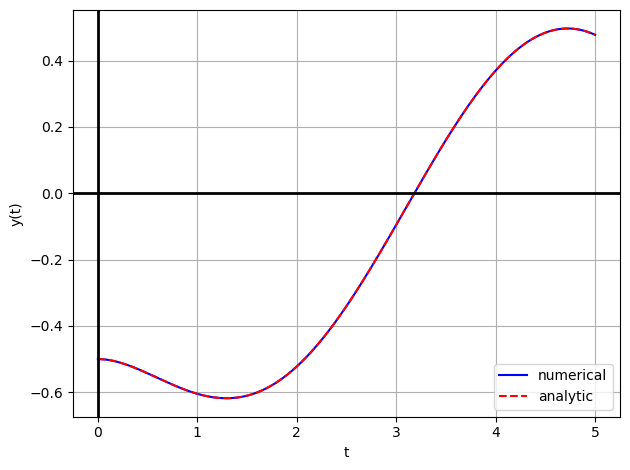

In [ ]:
draw_solution_y_with_exact_y(t_eval, y_eval[0], y_exact)

To see the effect of `N` (number of points within domain) to this problem, I create a new function whose input is N and pass this function to the `ipywidgets.interact`.

In [ ]:
#| export
def solve_and_draw_solution_y_with_exact_y(N # the number of points within the domain
                                          ):
    """[Ineractive purpose] Given N, solve the ivp problem and plot the solution function y(t)"""
    t = np.linspace(t_span[0], t_span[1], N)
    sol = solve_ivp(F, t_span, y0, t_eval=t) # Here, we don't use dense_output because we want to see the effect of N
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    y_exact = f_exact(t_eval)

    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.plot(sol.t, sol.y[0], color='blue', linestyle='solid', label='numerical') # y(t)
    ax.plot(t_eval, y_exact, color='red', linestyle='dashed', label='analytic') # y(t)                                 
    ax.axhline(0, color='k', linewidth=2) # x-axis
    ax.axvline(0, color='k', linewidth=2) # y-axis
    ax.grid(True)
    ax.set_xlabel('t')
    ax.set_ylabel('y(t)')
    ax.legend()
                                        
    plt.tight_layout()

In [ ]:
show_doc(solve_and_draw_solution_y_with_exact_y)

---

### solve_and_draw_solution_y_with_exact_y

>      solve_and_draw_solution_y_with_exact_y (N)

[Ineractive purpose] Given N, solve the ivp problem and plot the solution function y(t)

|    | **Details** |
| -- | ----------- |
| N | the number of points within the domain |

In [ ]:
from ipywidgets import interact

In [ ]:
interact(solve_and_draw_solution_y_with_exact_y, N=(2, 50, 1))

interactive(children=(IntSlider(value=26, description='N', max=50, min=2), Output()), _dom_classes=('widget-in…

<function __main__.solve_and_draw_solution_y_with_exact_y(N)>

As we expected, increasing `N` increases the accuracy of the solution.

## ODE - BVP(Boundary Value Problem)

### How to solve BVP using scipy

The overall structure is as follows:

```python
from scipy.integrate import solve_bvp

sol = solve_bvp(F, bc, x, y0)
```

### The given problem

- Target `y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     f(x) \\
                     \displaystyle\frac{df(x)}{dx} \\
                     \displaystyle\frac{d^2 f(x)}{dx^2} \\
                     \vdots \\
                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}  \\
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1] \\
                     S[2] \\
                     \vdots \\
                     S[n-1]  \\
                 \end{bmatrix}
$$

- ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x)) = \begin{bmatrix}
                             \displaystyle\frac{df(x)}{dx} \\
                             \displaystyle\frac{d^2 f(x)}{dx^2} \\
                             \displaystyle\frac{d^3 f(x)}{dx^3} \\
                             \vdots \\
                             \displaystyle\frac{d^{n} f(x)}{dx^{n}}  \\
                         \end{bmatrix}
                         = \begin{bmatrix}
                             S[1] \\
                             S[2] \\
                             S[3] \\
                             \vdots \\
                             \mathcal{F}\left(x, S[0], S[1], S[2], \cdots, S[n-1] \right)  \\
                         \end{bmatrix}
$$

- Domain `x_span=[x_a, x_b]`
$$
x \in [x_a, x_b]
$$
    - If the number of points `N` is given, `x = np.linspace(x_span[0], x_span[1], N)`.

    - If the spacing `h` is given, `x = np.arange(x_span[0], x_span[1]+h, h)`. Here, the purpose of `+h` in `x_span[1]+h` is to include the value of `x_span[1]` in the array `x`.


- Boundary condition function `bc` defined from `ya`, `yb`

$$
\text{ya} = \mathbf{S}(x_a) = \begin{bmatrix}
                                     f(x=x_a) \\
                                     \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_a} \\
                                     \displaystyle\frac{d^2 f(x)}{dx^2}\Bigr|_{x=x_a} \\
                                     \vdots \\
                                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}\Bigr|_{x=x_a}  \\
                              \end{bmatrix}
$$

$$
\text{yb} = \mathbf{S}(x_b) = \begin{bmatrix}
                                     f(x=x_b) \\
                                     \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_b} \\
                                     \displaystyle\frac{d^2 f(x)}{dx^2}\Bigr|_{x=x_b} \\
                                     \vdots \\
                                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}\Bigr|_{x=x_b}  \\
                              \end{bmatrix}
$$

Since the number of elements of $\text{ya}$ and $\text{yb}$ is larger than the number of boundary conditions required by the ODE, we often know the part of elements of $\text{ya}$ and $\text{yb}$. 


$$
\text{bc} = \begin{bmatrix}
                 \text{ya} - \mathbf{S}(x_a) \\
                 \text{yb} - \mathbf{S}(x_b)
            \end{bmatrix}
$$

Therefore, the elements of $\text{bc}$ are zero when boundary conditions are satisfied.

- Initial guess `y0`

For the given spacing `h`, 


$$
\begin{align}
\text{y0} & = [\mathbf{S}(x_a), \mathbf{S}(x_a + h), \mathbf{S}(x_a + 2h), \cdots, \mathbf{S}(x_b)] \\
          & = \begin{bmatrix}
                  f(x=x_a) & f(x=x_a+h) & f(x=x_a+2h) & \cdots & f(x=x_b) \\ 
                  \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_a} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_a+h} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_a+2h} & \cdots & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=x_b} \\
                  \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=x_a} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=x_a+h} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=x_a+2h} & \cdots & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=x_b} \\
                  \vdots & \vdots & \vdots & \vdots & \vdots \\ 
                  \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=x_a} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=x_a+h} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=x_a+2h} & \cdots & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=x_b} \\
               \end{bmatrix}
\end{align}
$$

We must give the solver this initial guess `y0` to solve BVP.

### Solution

- Target `sol.y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     f(x) \\
                     \displaystyle\frac{df(x)}{dx} \\
                     \displaystyle\frac{d^2 f(x)}{dx^2} \\
                     \vdots \\
                     \displaystyle\frac{d^{n-1} f(x)}{dx^{n-1}}  \\
                 \end{bmatrix}
$$

- Domain `sol.x`
$$
x = [x_a, \cdots, x_b]
$$

### Homogeneous BVP

If the differential equation is homogeneous 

$$
\frac{d\mathbf{S}}{dx} - \mathbf{F}(x, \mathbf{S}(x); \lambda) = 0
$$

and the boundary conditions are also homogeneous

$$
\mathbf{S}(x_a) = 0 
$$

$$
\mathbf{S}(x_b) = 0
$$

then this BVP is a homogeneous problem.

Since every homogeneous problem has a trivial solution (zero solution), there is a condition for nontrivial solutions (nonzero solutions).

For the condition there should exist the unknown parameter $\lambda$ of the homogeneous ODE, which is just a constant, not a target function.

Depending the value of the parameter $\lambda$, the homogeneous BVP does not have a solution or has either a trivial solution or a nontrivial solution. 

The condition for nontrivial solutions is called a **dispersion relation** and the value of the parameter $\lambda$ which gives a nontrivial solution is called **eigenvalue** and that nontrivial solution is called corresponding **eigenfunction**.

In that sense, homogeneous BVP (with parameters) is essentially a eigenvalue problem in linear algebra.

### References
- [scipy solve_bvp docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)
- [PDF about IVP and BVP in Python](https://acme.byu.edu/0000017c-ccfe-da17-a5fd-cdfeff540000/acmefiles-08-bvp-2021-pdf)
- [Python Programming and Numerical Methods, Chap 23](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.00-ODE-Boundary-Value-Problems.html)
- [Differential Equations in Paul's Online Math Notes, Chap 8](https://tutorial.math.lamar.edu/Classes/DE/IntroBVP.aspx)

## BVP Example1 - solve_bvp

$$
\begin{cases}
  y''+ 9y = \cos x \\ 
  x \in [0, \pi] \\
  y'(0) = 5 \\
  y(\pi) = \displaystyle-\frac{5}{3} \\
\end{cases}
$$ 

### Rewrite ODE using $\mathbf{S}(t)$

- Target `y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     y(x) \\
                     y'(x)
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1]
                 \end{bmatrix}
$$

- ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x)) 
                       = \begin{bmatrix}
                             y'(x) \\
                             y''(x)
                         \end{bmatrix}
                       = \begin{bmatrix}
                             y'(x) \\
                             -9y + \cos t
                         \end{bmatrix}
                       = \begin{bmatrix}
                             S[1] \\
                             -9S[0] + \cos x
                         \end{bmatrix} 
$$

- Domain
  
```python
x_span = [0, np.pi]
N = 100 # number of points
x = np.linspace(x_span[0], x_span[1], N)
```

- Boundary condition function `bc` defined from `ya`, `yb`

$$
\text{ya} = \mathbf{S}(0) = \begin{bmatrix}
                                 y(0) \\
                                 y'(0)
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 ? \\
                                 5
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 \text{ya}[0] \\
                                 \text{ya}[1]
                             \end{bmatrix}
$$

$$
\text{yb} = \mathbf{S}(\pi) = \begin{bmatrix}
                                 y(\pi) \\
                                 y'(\pi)
                             \end{bmatrix}
                            = \begin{bmatrix}
                                 \displaystyle-\frac{5}{3} \\
                                 ?
                              \end{bmatrix}
                            = \begin{bmatrix}
                                 \text{yb}[0] \\
                                 \text{yb}[1]
                              \end{bmatrix}
$$


$$
\text{bc} = \begin{bmatrix}
                 \text{ya} - \mathbf{S}(x_a) \\
                 \text{yb} - \mathbf{S}(\pi)
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[1] - 5 \\
                 \text{yb}[0] - \left(\displaystyle-\frac{5}{3}\right)
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[1] - 5 \\
                 \text{yb}[0] + \displaystyle\frac{5}{3}
            \end{bmatrix}
$$


- Initial guess `y0`

For the given spacing `h`, 

$$
\begin{align}
\text{y0} & = [\mathbf{S}(0), \mathbf{S}(0 + h), \mathbf{S}(0 + 2h), \cdots, \mathbf{S}(\pi)] \\
          & = \begin{bmatrix}
                  f(x=0) & f(x=0+h) & f(x=0+2h) & \cdots & f(x=\pi) \\ 
                  \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0+h} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=\pi} \\
                  \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0+h} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=\pi} \\
                  \vdots & \vdots & \vdots & \vdots & \vdots \\ 
                  \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0+h} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=\pi} \\
               \end{bmatrix}
\end{align}
$$

```python
y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0 = np.vstack([y_init, dy_init])
```

In [ ]:
from scipy.integrate import solve_bvp

In [ ]:
def F(x, y):
    return [y[1], -9*y[0] + np.cos(x)]

def bc(ya, yb):
    return [ya[1] - 5, yb[0] + 5/3]

In [ ]:
x_span = [0, np.pi]
N = 100
x = np.linspace(x_span[0], x_span[1], N)
x

array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
       0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
       0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
       0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
       0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
       0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
       0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
       1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
       1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
       1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
       1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
       1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
       1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
       2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
       2.22132814, 2.2530614 , 2.28479466, 2.31652792, 2.34826

In [ ]:
y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0 = np.vstack([y_init, dy_init])
y0

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [ ]:
sol = solve_bvp(F, bc, x, y0)
sol

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  3.173e-02 ...  3.110e+00  3.142e+00]
           sol: <scipy.interpolate._interpolate.PPoly object>
             p: None
             y: [[ 1.667e+00  1.818e+00 ... -1.501e+00 -1.667e+00]
                 [ 5.000e+00  4.534e+00 ... -5.421e+00 -5.000e+00]]
            yp: [[ 5.000e+00  4.534e+00 ... -5.421e+00 -5.000e+00]
                 [-1.400e+01 -1.536e+01 ...  1.251e+01  1.400e+01]]
 rms_residuals: [ 6.168e-06  6.239e-06 ...  7.190e-06  6.478e-06]
         niter: 1

`solve_bvp` always gives solution [function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PPoly.html#scipy.interpolate.PPoly), unlike `solve_ivp`. There is no `dense_output` option.

In [ ]:
sol.sol

<scipy.interpolate._interpolate.PPoly>

Domain

In [ ]:
sol.x

array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
       0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
       0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
       0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
       0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
       0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
       0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
       1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
       1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
       1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
       1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
       1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
       1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
       2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
       2.22132814, 2.2530614 , 2.28479466, 2.31652792, 2.34826

Solution

In [ ]:
sol.y

array([[ 1.66666846,  1.81805145,  1.95397555,  2.07320827,  2.17466729,
         2.25743026,  2.32074312,  2.36402694,  2.3868832 ,  2.38909739,
         2.37064095,  2.33167154,  2.27253163,  2.19374541,  2.09601405,
         1.98020934,  1.84736586,  1.69867159,  1.53545714,  1.3591838 ,
         1.17143022,  0.97387822,  0.76829752,  0.55652976,  0.34047183,
         0.12205872, -0.09675397, -0.31400776, -0.52775896, -0.73609625,
        -0.93715802, -1.1291491 , -1.31035711, -1.47916786, -1.63407996,
        -1.7737184 , -1.89684698, -2.00237945, -2.08938935, -2.15711833,
        -2.20498304, -2.23258033, -2.23969093, -2.22628133, -2.19250412,
        -2.13869654, -2.06537741, -1.97324238, -1.86315763, -1.73615197,
        -1.59340748, -1.43624882, -1.26613114, -1.08462693, -0.89341169,
        -0.69424876, -0.48897333, -0.27947575, -0.0676844 ,  0.14445179,
         0.35498106,  0.56196648,  0.76350357,  0.95773752,  1.14288009,
         1.31722577,  1.47916726,  1.62721012,  1.7

Define the function for drawing bvp solutions y(x), y'(x)

In [ ]:
#| export
def draw_bvp_solution_y_yp(x, # the array of time domain [x1, x2, ... ,xN]  
                           y, # the array of ode output [y(x), y'(x)]
                          **kwargs):
    """ Draw ode output [y(x), y'(x)] """
    fig, axes = plt.subplots(nrows=2, ncols=1)

    axes[0].plot(x, y[0], **kwargs) # y(t)
    axes[0].axhline(0, color='k', linewidth=2) # x-axis
    axes[0].axvline(0, color='k', linewidth=2) # y-axis
    axes[0].grid(True)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y(x)')
    
    axes[1].plot(x, y[1], **kwargs) # y'(t)
    axes[1].axhline(0, color='k', linewidth=2) # x-axis
    axes[1].axvline(0, color='k', linewidth=2) # y-axis
    axes[1].grid(True)
    axes[1].set_xlabel('x')
    axes[1].set_ylabel(r"$y'(x)$")
    
    plt.tight_layout()

In [ ]:
show_doc(draw_bvp_solution_y_yp)

---

### draw_bvp_solution_y_yp

>      draw_bvp_solution_y_yp (x, y, **kwargs)

Draw ode output [y(x), y'(x)]

|    | **Details** |
| -- | ----------- |
| x | the array of time domain [x1, x2, ... ,xN] |
| y | the array of ode output [y(x), y'(x)] |
| kwargs |  |

Draw the solutions with `sol.x` and `sol.y`

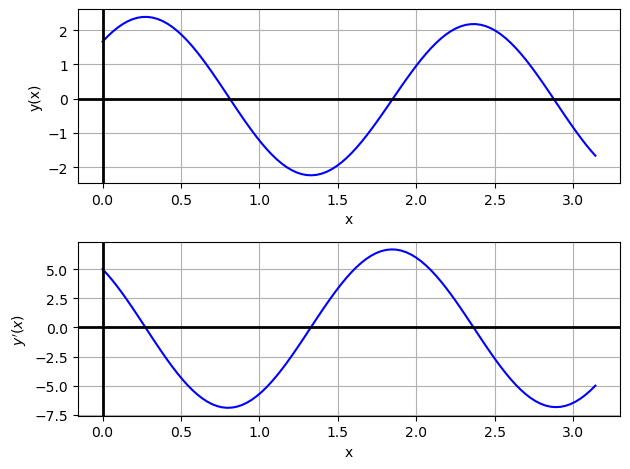

In [ ]:
draw_bvp_solution_y_yp(sol.x, sol.y, color='blue')

In [ ]:
x_eval = np.linspace(x_span[0], x_span[1], 1000)
y_eval = sol.sol(x_eval)

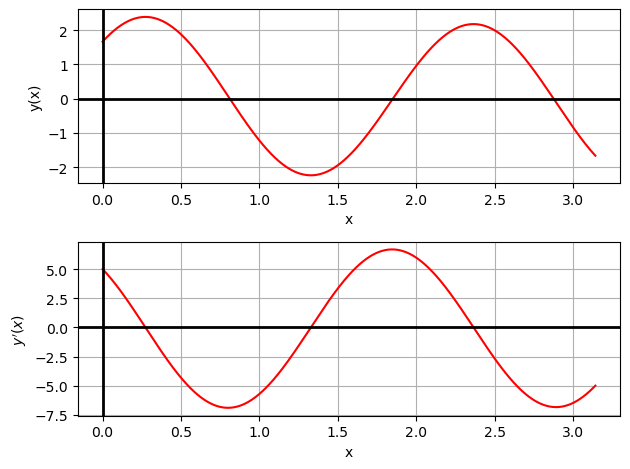

In [ ]:
draw_bvp_solution_y_yp(x_eval, y_eval, color='red')

## BVP Example1 - solve_ivp

We can solve the given BVP using shooting method, by converting BVP into IVP and using `solve_ivp` & `fsolve`.

The given BVP is as follows:
$$
\begin{cases}
  y''+ 9y = \cos x \\ 
  x \in [0, \pi] \\
  y'(0) = 5 \\
  y(\pi) = \displaystyle-\frac{5}{3} \\
\end{cases}
$$ 

To convert this BVP into IVP, we define $y(0) = \alpha$, where $\alpha$ is unknown.

Then the given BVP is converted into IVP with a boundary condition at the other end of the domain.
$$
\begin{cases}
  y''+ 9y = \cos x \\ 
  x \in [0, \pi] \\
  y(0) = \alpha \\
  y'(0) = 5 \\
  \\
  y(\pi) = \displaystyle-\frac{5}{3}
\end{cases}
$$ 

First we solve the IVP with initial guess $\alpha$ then the get the boundary condition at $x=\pi$ as 
- $y(\pi)$ = `sol.y[0][-1]`
- $y'(\pi)$ = `sol.y[1][-1]`

Since we know $y(\pi) = \displaystyle-\frac{5}{3}$, we define following function $\text{obj}(\alpha)$

$$
\text{obj}(\alpha) = \text{sol.y[0][-1]}(\alpha) - y(\pi) = \text{sol.y[0][-1]}(\alpha) + \displaystyle\frac{5}{3}
$$

If we can find $\alpha$ such that $\text{obj}(\alpha)=0$, then we find appropriate initial condition $y(0) = \alpha$ and also we find the wanted solution.

### Rewrite ODE using $\mathbf{S}(t)$

- Target `y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     y(x) \\
                     y'(x)
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1]
                 \end{bmatrix}
$$

- ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x)) 
                       = \begin{bmatrix}
                             y'(x) \\
                             y''(x)
                         \end{bmatrix}
                       = \begin{bmatrix}
                             y'(x) \\
                             -9y + \cos t
                         \end{bmatrix}
                       = \begin{bmatrix}
                             S[1] \\
                             -9S[0] + \cos x
                         \end{bmatrix} 
$$

- Domain
  
```python
x_span = [0, np.pi]
N = 100 # number of points
x = np.linspace(x_span[0], x_span[1], N)
```

- Initial condition `y0`
$$
\mathbf{S}(0) = \begin{bmatrix}
                    y(0) \\
                    y'(0) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    \alpha \\
                    5 \\
                \end{bmatrix}
$$

with boundary condition $y(\pi) = \displaystyle-\frac{5}{3}$

- Objective function $\text{obj}(\alpha)$

$$
\text{obj}(\alpha) = \text{sol.y[0][-1]}(\alpha) - y(\pi) = \text{sol.y[0][-1]}(\alpha) + \displaystyle\frac{5}{3}
$$

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def F(x, y):
    return [y[1], -9*y[0] + np.cos(x)]

x_span = [0, np.pi]
N = 100
x = np.linspace(x_span[0], x_span[1], N)

def obj(a # initial guess of root. it should be array.
       ):
    y0 = [a[0], 5]
    sol = solve_ivp(F, x_span, y0, t_eval=x)
    return sol.y[0][-1] + 5/3

In [ ]:
from scipy.optimize import fsolve

In [ ]:
fsolve(obj, [1])

array([1.66250783])

In [ ]:
a, = fsolve(obj, [1])
a

1.6625078282923273

In [ ]:
y0 = [a, 5]
sol = solve_ivp(F, x_span, y0, t_eval=x, dense_output=True)
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.173e-02 ...  3.110e+00  3.142e+00]
        y: [[ 1.663e+00  1.814e+00 ... -1.502e+00 -1.667e+00]
            [ 5.000e+00  4.535e+00 ... -5.409e+00 -4.987e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 68
     njev: 0
      nlu: 0

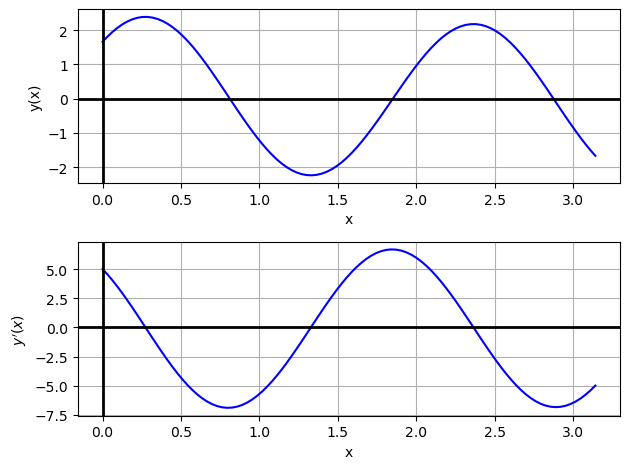

In [ ]:
draw_bvp_solution_y_yp(sol.t, sol.y, color='blue')

Ok, it works. Then we make this more interactive.

The ODE itserlf and domain are the same in both `solve_bvp` and `solve_ivp`.

In [ ]:
def F(x, y):
    return [y[1], -9*y[0] + np.cos(x)]

x_span = [0, np.pi]
N = 100
x = np.linspace(x_span[0], x_span[1], N)

For `solve_bvp`, we define `bc` and `y0_bvp`.

In [ ]:
def bc(ya, yb):
    return [ya[1] - 5, yb[0] + 5/3]

y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0_bvp = np.vstack([y_init, dy_init])
y0_bvp

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

The `bvp` solution is

In [ ]:
sol_bvp = solve_bvp(F, bc, x, y0_bvp)
sol_bvp

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  3.173e-02 ...  3.110e+00  3.142e+00]
           sol: <scipy.interpolate._interpolate.PPoly object>
             p: None
             y: [[ 1.667e+00  1.818e+00 ... -1.501e+00 -1.667e+00]
                 [ 5.000e+00  4.534e+00 ... -5.421e+00 -5.000e+00]]
            yp: [[ 5.000e+00  4.534e+00 ... -5.421e+00 -5.000e+00]
                 [-1.400e+01 -1.536e+01 ...  1.251e+01  1.400e+01]]
 rms_residuals: [ 6.168e-06  6.239e-06 ...  7.190e-06  6.478e-06]
         niter: 1

In [ ]:
x_eval = np.linspace(x_span[0], x_span[1], 1000)
y_eval = sol_bvp.sol(x_eval)

In [ ]:
def solve_and_draw_with_bvp(a # initial condition guess in shooting method
                            ):
    """Given a, solve ivp and draw the result with bvp result (correct result)"""

    # solve bvp with shooting method
    y0 = [a, 5]
    sol_ivp = solve_ivp(F, x_span, y0, t_eval=x, dense_output=True)

    y_eval_ivp = sol_ivp.sol(x_eval)
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    ax.plot(np.pi, -5/3, 'ko') # BC 
    ax.plot(x_eval, y_eval_ivp[0], color='blue', linestyle='solid', label='shooting')
    ax.plot(x_eval, y_eval[0], color='red', linestyle='dashed', label='bvp')
    ax.axhline(0, color='k', linewidth=2) # x-axis
    ax.axvline(0, color='k', linewidth=2) # y-axis
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y(x)')
    
    plt.tight_layout()

In [ ]:
from ipywidgets import interact

In [ ]:
interact(solve_and_draw_with_bvp, a=(-3, 3, 0.01))

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0, step=0.01), Output()), _dom_c…

<function __main__.solve_and_draw_with_bvp(a)>

As you can see, about $a=1.66$ is the appropriate initial condition.

## BVP Example2

$$
\begin{cases}
  y'' = -g \\ 
  x \in [0, 5] \\
  y(0) = 0 \\
  y(5) = 50 \\
\end{cases}
$$ 

where $g=9.8$

### Rewrite ODE using $\mathbf{S}(t)$ - solve_bvp

- Target `y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     y(x) \\
                     y'(x)
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1]
                 \end{bmatrix}
$$

- ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x)) 
                       = \begin{bmatrix}
                             y'(x) \\
                             y''(x)
                         \end{bmatrix}
                       = \begin{bmatrix}
                             y'(x) \\
                             -g
                         \end{bmatrix}
                       = \begin{bmatrix}
                             S[1] \\
                             -g
                         \end{bmatrix} 
$$

- Domain
  
```python
x_span = [0, 5]
N = 100 # number of points
x = np.linspace(x_span[0], x_span[1], N)
```

- Boundary condition function `bc` defined from `ya`, `yb`

$$
\text{ya} = \mathbf{S}(0) = \begin{bmatrix}
                                 y(0) \\
                                 y'(0)
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 0 \\
                                 ?
                             \end{bmatrix}
                          = \begin{bmatrix}
                                 \text{ya}[0] \\
                                 \text{ya}[1]
                             \end{bmatrix}
$$

$$
\text{yb} = \mathbf{S}(5) = \begin{bmatrix}
                                 y(\pi) \\
                                 y'(\pi)
                             \end{bmatrix}
                            = \begin{bmatrix}
                                 50 \\
                                 ?
                              \end{bmatrix}
                            = \begin{bmatrix}
                                 \text{yb}[0] \\
                                 \text{yb}[1]
                              \end{bmatrix}
$$


$$
\text{bc} = \begin{bmatrix}
                 \text{ya} - \mathbf{S}(0) \\
                 \text{yb} - \mathbf{S}(5)
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0] - 0 \\
                 \text{yb}[0] - 50
            \end{bmatrix}
          = \begin{bmatrix}
                 \text{ya}[0]\\
                 \text{yb}[0] -50
            \end{bmatrix}
$$


- Initial guess `y0`

For the given spacing `h`, 

$$
\begin{align}
\text{y0} & = [\mathbf{S}(0), \mathbf{S}(0 + h), \mathbf{S}(0 + 2h), \cdots, \mathbf{S}(\pi)] \\
          & = \begin{bmatrix}
                  f(x=0) & f(x=0+h) & f(x=0+2h) & \cdots & f(x=\pi) \\ 
                  \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0+h} & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{df(x)}{dx}\Bigr|_{x=\pi} \\
                  \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0+h} & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{d^2f(x)}{dx^2}\Bigr|_{x=\pi} \\
                  \vdots & \vdots & \vdots & \vdots & \vdots \\ 
                  \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0+h} & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=0+2h} & \cdots & \displaystyle\frac{d^{n-1}f(x)}{dx^{n-1}}\Bigr|_{x=\pi} \\
               \end{bmatrix}
\end{align}
$$

```python
y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0 = np.vstack([y_init, dy_init])
```

In [ ]:
from scipy.integrate import solve_bvp

In [ ]:
#| eval:false
def F(x, y):
    g = 9.8
    return [y[1], -g] 

x_span = [0, 5]
N = 100
x = np.linspace(x_span[0], x_span[1], N)

def bc(ya, yb):
    return [ya[0], yb[0]-50]

y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0 = np.vstack([y_init, dy_init])

In [ ]:
#| eval:false
sol = solve_bvp(F, bc, x, y0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Why this error happens?

It is because `g` is scalar (length 1), so the length of `y[1]` is not equal to the length of `g`.

To resolve this error, the possible solution is to use  `-g + 0*y[0]` instead of just `-g`.


In [ ]:
def F(x, y):
    g = 9.8
    return [y[1], -g + 0*y[0]] 

x_span = [0, 5]
N = 100
x = np.linspace(x_span[0], x_span[1], N)

def bc(ya, yb):
    return [ya[0], yb[0]-50]

y_init = np.ones_like(x)
dy_init = np.ones_like(x)
y0 = np.vstack([y_init, dy_init])

In [ ]:
sol = solve_bvp(F, bc, x, y0)
sol

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object>
             p: None
             y: [[ 1.354e-14  1.730e+00 ...  5.072e+01  5.000e+01]
                 [ 3.450e+01  3.401e+01 ... -1.401e+01 -1.450e+01]]
            yp: [[ 3.450e+01  3.401e+01 ... -1.401e+01 -1.450e+01]
                 [-9.800e+00 -9.800e+00 ... -9.800e+00 -9.800e+00]]
 rms_residuals: [ 3.654e-16  3.654e-16 ...  1.038e-14  1.864e-15]
         niter: 1

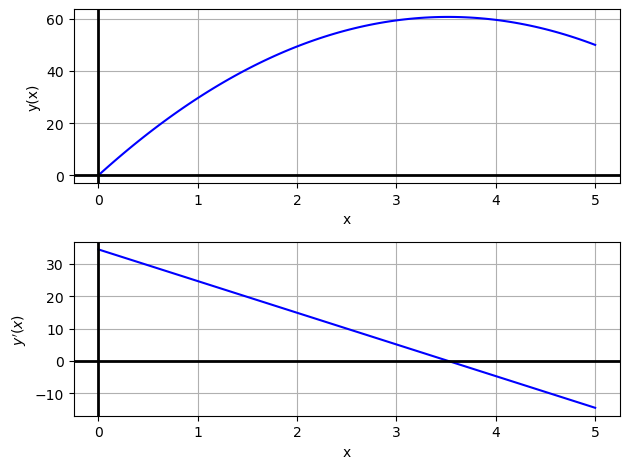

In [ ]:
draw_bvp_solution_y_yp(sol.x, sol.y, color='blue')

### Rewrite ODE using $\mathbf{S}(t)$ - solve_ivp

- Target `y`
$$
\mathbf{S}(x) = \begin{bmatrix}
                     y(x) \\
                     y'(x)
                 \end{bmatrix}
              = \begin{bmatrix}
                     S[0] \\
                     S[1]
                 \end{bmatrix}
$$

- ODE system `F(x, y)`
$$
\frac{d\mathbf{S}}{dx} = \mathbf{F}(x, \mathbf{S}(x)) 
                       = \begin{bmatrix}
                             y'(x) \\
                             y''(x)
                         \end{bmatrix}
                       = \begin{bmatrix}
                             y'(x) \\
                             -g
                         \end{bmatrix}
                       = \begin{bmatrix}
                             S[1] \\
                             -g
                         \end{bmatrix} 
$$

- Domain
  
```python
x_span = [0, 5]
N = 100 # number of points
x = np.linspace(x_span[0], x_span[1], N)
```

- Initial condition `y0`
$$
\mathbf{S}(0) = \begin{bmatrix}
                    y(0) \\
                    y'(0) \\
                \end{bmatrix}
              = \begin{bmatrix}
                    0 \\
                    \alpha \\
                \end{bmatrix}
$$

with boundary condition $y(5) = 50$

- Objective function $\text{obj}(\alpha)$

$$
\text{obj}(\alpha) = \underbrace{\text{sol.y[0][-1]}}_{\text{depends on }\alpha}  - y(5) = \underbrace{\text{sol.y[0][-1]}}_{\text{depends on }\alpha} - 50
$$

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
def F(x, y):
    g = 9.8
    return [y[1], -g]

x_span = [0, 5]
N = 100
x = np.linspace(x_span[0], x_span[1], N)

def obj(a):
    y0 = [0, a[0]]
    sol = solve_ivp(F, x_span, y0, t_eval=x)
    return sol.y[0][-1] - 50

In [ ]:
from scipy.optimize import fsolve

In [ ]:
a, = fsolve(obj, [1])
a

34.49999999999998

In [ ]:
y0 = [0, a]
sol_ivp = solve_ivp(F, x_span, y0, t_eval=x, dense_output=True)
sol_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.051e-02 ...  4.949e+00  5.000e+00]
        y: [[ 0.000e+00  1.730e+00 ...  5.072e+01  5.000e+01]
            [ 3.450e+01  3.401e+01 ... -1.401e+01 -1.450e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object>
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

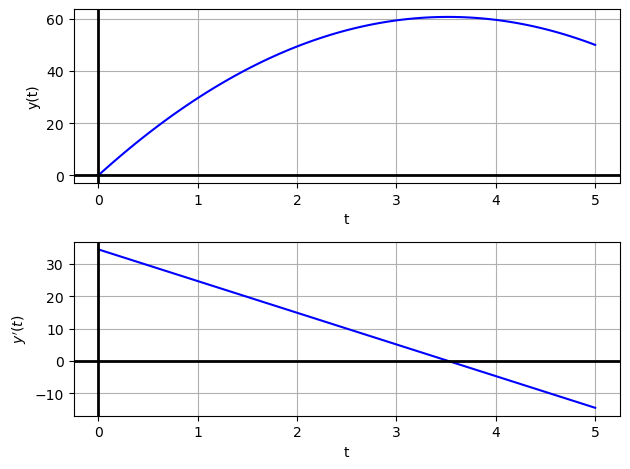

In [ ]:
draw_solution_y_yp(sol_ivp.t, sol_ivp.y, color='blue')

In [ ]:
x_eval = np.linspace(x_span[0], x_span[1], 1000)
y_eval = sol.sol(x_eval)

In [ ]:
def solve_and_draw_with_bvp(a # initial condition guess in shooting method
                            ):
    """Given a, solve ivp and draw the result with bvp result (correct result)"""

    # solve bvp with shooting method
    y0 = [0, a]
    sol_ivp = solve_ivp(F, x_span, y0, t_eval=x, dense_output=True)

    y_eval_ivp = sol_ivp.sol(x_eval)
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    ax.plot(5, 50, 'ko') # BC 
    ax.plot(x_eval, y_eval_ivp[0], color='blue', linestyle='solid', label='shooting')
    ax.plot(x_eval, y_eval[0], color='red', linestyle='dashed', label='bvp')
    ax.axhline(0, color='k', linewidth=2) # x-axis
    ax.axvline(0, color='k', linewidth=2) # y-axis
    ax.grid(True)
    ax.set_xlabel('x')
    ax.set_ylabel('y(x)')
    
    plt.tight_layout()

In [ ]:
from ipywidgets import interact

In [ ]:
interact(solve_and_draw_with_bvp, a=(0, 50, 0.5))

interactive(children=(FloatSlider(value=25.0, description='a', max=50.0, step=0.5), Output()), _dom_classes=('…

<function __main__.solve_and_draw_with_bvp(a)>

As you can see, about $a=34.5$ is the appropriate initial condition.